In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing all necessary modules in keras
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D, Dense
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
# mnist.load_data() function download the MNIST data set(Images of hand written digits) & divide it into two parts training set & test set.
# X_train holds the training samples & y_train holds the corresponding labels for training data. Likewise, X_test holds test data & y_test has the labels.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


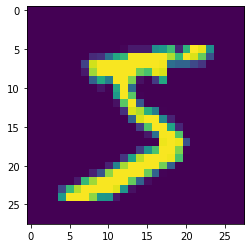

In [4]:
# X_train is a matrix which has 60K images each of size 28*28. X_train.shape returns the shape of the total training set
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
# visulaization of the 1st sample of training set which is an image of 5 as shown below.
plt.imshow(X_train[0])

In [0]:
# The train & test set are 3D matrix.The training set is of shape (60000,28,28) & test set is (10000,28,28). But here the CNN model expects
# the input shape to be 4D i.e (no of samples,height,width,channel).Channel implies whether the image is gray scale or colour(RGB). In case of
# RGB image the 4th dimension would be 3. In this case the images are gray scale. Hence, it is 1. That's why training & test set are reshaped into
# matrices of shape (60000,28,28,1) & (10000,28,28,1) respectively. 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# The data sets are matrices which has values between 0-255. These are normally the pixel values. It is a good practice to normalise the data.
#  Hence, dividing by 255 scales down each values between 0-1. But before doing that the data set values has to be converted to float to make sure
# after dividing by 255 these are stored as float. 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# 1st 10 labels for training set. As printed below the 1st element is 5 which implies the 1st image of training set is of digit 5 and so on. 
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# As shown above the label matrix(Y_train & Y_test) holds values that implies what digit the image is about. So, keras may find some relational order
# between these values. To avoid this problem we hot encode the matrix into a binary matrix. This matrix has number of columns equal to the number
# of classes(10 columns in this scenario). Each row defines the label of one sample point in data set & has only one '1' & others are '0'. '1' at
# particular index position implies the digit equal to the column number. For example, the 1st row(1st sample of training data set) has '1' at column
# number 5(starting from 0) which means this is image of digit 5.
# Convert 1-dimensional class arrays to 10-dimensional class matrices 
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Label matrix hot encoded into binary matrix
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 

# Input shape = 28*28*1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Input shape = 26*26*32, receptive field = 3*3
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Input shape = 24*24*64, receptive field = 5*5
model.add(Convolution2D(128, 3, 3, activation='relu'))

# input shape = 22*22*128, Receptive field = 7*7
model.add(MaxPooling2D(pool_size=(2, 2)))

# Input = 11*11*128, Receptive field = 7*7
model.add(Convolution2D(256, 3, 3, activation='relu'))

# input = 9*9*256, Receptive field = 9*9
model.add(Convolution2D(512, 3, 3, activation='relu'))

# input = 7*7*512, Receptive field = 11*11
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# input = 5*5*1024, Receptive field = 13*13
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# input = 3*3*2048, Receptive field = 15*15
model.add(Convolution2D(10, 3, 3, activation='relu'))

# input = 1*1*10, receptive field= 17*17
# Flatten layer will convert 1*1*10 input matrix into a vector of 10 neurons
model.add(Flatten())
model.add(Activation('softmax'))

# summary() function displays the model structure i.e for each layer how many parameters used, what is the shape of output image
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2

In [11]:
# Compile the model with 'adam' optimizer. Since this is multi class problem (10 classes) 'categorical_crossentropy' is used as loss function.
# accuracy is used as metrics which means while training this accuracy metrics will be shown.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# Train the model with fit() which takes the training data set along with the label matrix. Epoch means one round of the whole data set. Batch size
# determines in an epoch how many images to be processed parallelly. Batch size 32 means in an epoch in one iteration 32 images are processed.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 222s 4ms/step - loss: 2.3027 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 213s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 213s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 213s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.

In [0]:
# Now the model is trained which means the weights are optimized. model.evaluate() predicts the classes of each image in test set & then calculate
# test set loss & accuracy.
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
# score is a vector that holds the test set loss & accuracy
print(score)

[2.3025851249694824, 0.098]


In [0]:
# Predict the class of each image in test set & stores in y_pred matrix
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


The above model during training stucks in an accuracy of around 0.098 & same in case of test set. The model does not use any dense layer. As we know that in CNN the function of convolution layers is to extract features like edges, textures, patterns, parts of objects & objects. The dense layers at the end of network combine these features & performs classification based on the features extracted in previous layers. In layman's term the dense layers are traditional ANN which has a '**softmax**' function. This activation function outputs an probability for each sample point in data set.

So, the first step for improving the above model should be adding dense layers.

Model 2 : Added dense layers at the end

In [17]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 

# Input shape = 28*28*1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Input shape = 26*26*32, receptive field = 3*3
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Input shape = 24*24*64, receptive field = 5*5
model.add(Convolution2D(128, 3, 3, activation='relu'))

# input shape = 22*22*128
model.add(MaxPooling2D(pool_size=(2, 2)))

# Input = 11*11*128, Receptive field = 7*7
model.add(Convolution2D(256, 3, 3, activation='relu'))

# input = 9*9*256, Receptive field = 9*9
model.add(Convolution2D(512, 3, 3, activation='relu'))

# input = 7*7*512, Receptive field = 11*11
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# input = 5*5*1024, Receptive field = 13*13
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# input = 3*3*2048, Receptive field = 15*15
model.add(Convolution2D(10, 3, 3))

# input = 1*1*10, receptive field= 17*17
# Flatten layer will convert 1*1*10 input matrix into a vector of 10 neurons
model.add(Flatten())
# model.add(Activation('softmax'))

model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

# summary() function displays the model structure i.e for each layer how many parameters used, what is the shape of output image
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2

In [0]:
# Compile the model with 'adam' optimizer. Since this is multi class problem (10 classes) 'categorical_crossentropy' is used as loss function.
# accuracy is used as metrics which means while training this accuracy metrics will be shown.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
# Train the model with fit() which takes the training data set along with the label matrix. Epoch means one round of the whole data set. Batch size
# determines in an epoch how many images to be processed parallelly. Batch size 32 means in an epoch in one iteration 32 images are processed.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.2041 - acc: 0.9349
Epoch 2/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0660 - acc: 0.9816
Epoch 3/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0466 - acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0379 - acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0353 - acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0284 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0259 - acc: 0.9927
Epoch 8/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0264 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0210 - acc: 0.9943
Epoch 10/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0191 - a

Just by adding dense layer in the model the accuracy improves from 0.0987 to 0.99. Additionally this model can be improved by reducing the number of layers. Since MNIST data is simple the same accuracy can be achieved by less number of layers.

In [0]:
# Now the model is trained which means the weights are optimized. model.evaluate() predicts the classes of each image in test set & then calculate
# test set loss & accuracy.
score = model.evaluate(X_test, Y_test, verbose=0)

In [21]:
# score is a vector that holds the test set loss & accuracy
print(score)

[0.07408649662502048, 0.988]
